In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
gdf = gpd.read_file('data/cb_2018_us_county_5m.shp')

## The problem

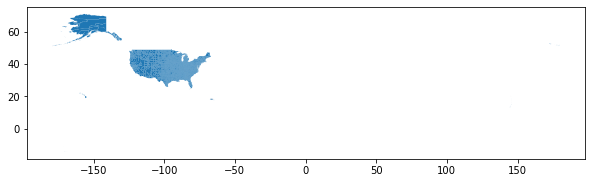

In [3]:
gdf.plot(figsize = (10,6))

## Method 1: Only use mainland geographies

In [4]:
# American Samoa, Guam, Northern Mariana Islands, Puerto Rico, Virgin Islands, Alaska, and Hawaii
outlier_STATEFP = ['60','66','69','72','78','02','15']

In [5]:
# the ~ indicates to select all that are not within the list
gdf_mainland = gdf[~gdf['STATEFP'].isin(outlier_STATEFP)]

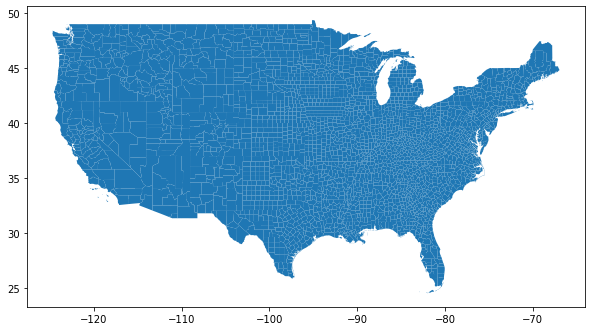

In [6]:
gdf_mainland.plot(figsize = (10,6))

In [7]:
# project to US friendly EPSG:102003 USA_Contiguous_Albers_Equal_Area_Conic
gdf_albers = gdf_mainland.to_crs('esri:102003')

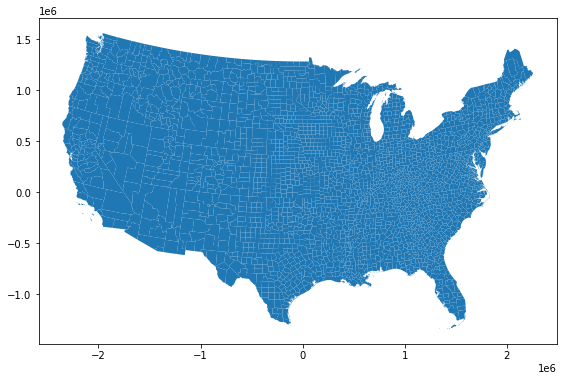

In [8]:
gdf_albers.plot(figsize = (10,6))

## Method 2: zooming in

In [9]:
# reproject 
gdf_albers2 = gdf.to_crs('esri:102003')

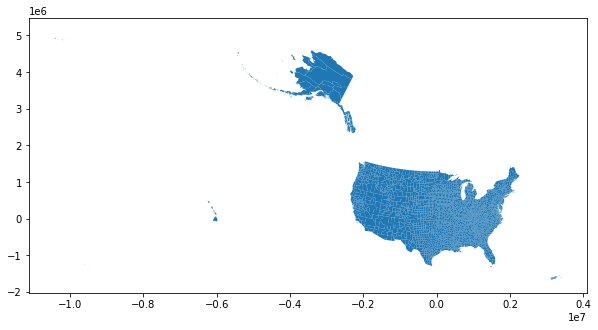

In [10]:
gdf_albers2.plot(figsize = (10,6))

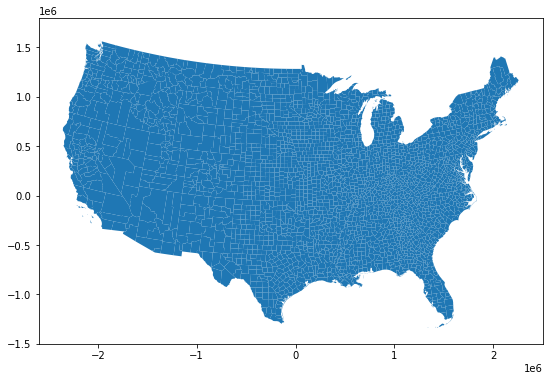

In [11]:
# you could "zoom in"
# Plot the data with a modified spatial extent
fig, ax = plt.subplots(figsize = (10,6))

xlim = (-2600000,2500000)
ylim = (-1500000,1800000)

ax.set_xlim(xlim)
ax.set_ylim(ylim)

gdf_albers2.plot(ax=ax)